In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(101)

In [2]:
# One-hot coding
from scipy import sparse
def convert_labels(y, C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))),
                         shape = (C, len(y))).toarray()
    return Y

In [3]:
def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [4]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta * xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if (count % check_w_after == 0):
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

In [5]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [6]:
# Example

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T # each column is a datapoint
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

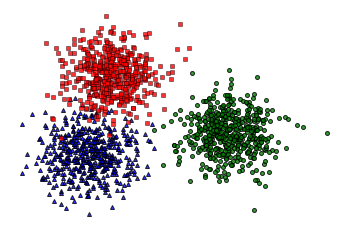

In [7]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    #plt.figure(figsize = (8, 6))
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8,
            markeredgewidth = 1, markeredgecolor = 'black')
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8,
            markeredgewidth = 1, markeredgecolor = 'black')
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8,
            markeredgewidth = .5, markeredgecolor = 'black')
    
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [9]:
W_init = np.random.randn(X.shape[0], C)
eta = 0.05
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.75848096 -4.39229203 -4.23012377]
 [-0.42351311  2.00086569 -0.38127453]
 [-1.69779472 -1.5513627   1.41754307]]


In [10]:
# Visualize result

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

XX = np.concatenate((np.ones((1, xx.size)), xx.ravel().reshape(1, xx.size), yy.ravel().reshape(1, yy.size)), axis = 0)

Z = pred(W[-1], XX)

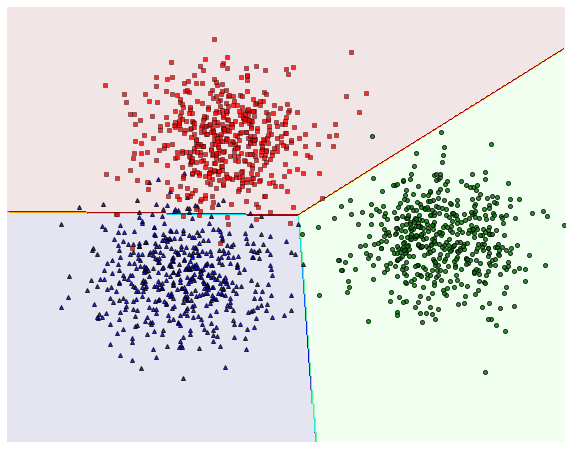

In [11]:
# Put the result into a color plot

Z = Z.reshape(xx.shape)

plt.figure(figsize = (10,8))
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
#plt.savefig('softmax-func.png', bbox_inches='tight', dpi = 300)
plt.show()